 # 【問題1】ジニ不純度を求める関数
まずは空間を分割するための指標値、ジニ不純度を計算する関数を作成してください。ノード
t
に対するジニ不純度
I
(
t
)
 は以下の数式で求まります。
<br>
 - クラス1:サンプル数15, クラス2:サンプル数15 → ジニ不純度0.500
 - クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15 → ジニ不純度0.667
 - クラス1:サンプル数18, クラス2:サンプル数12 → ジニ不純度0.480
 - クラス1:サンプル数30, クラス2:サンプル数0 → ジニ不純度0.000

In [9]:
import numpy as np
import pandas as pd

In [10]:
def Gini_impurity(n, c1_n):
    a = 0
    for i in c1_n:   
        a += (i/n) ** 2
    gini=1 - a 
    return gini

In [11]:
list_C=[15.0 ,15.0]
Gini_impurity(30, list_C) 

0.5

In [12]:
a = [12, 13]
b = [15, 15]

a[1] + b[1]

28

In [13]:
sum(a)

25

In [14]:
Gini_impurity(30,[18, 12])

0.48

In [15]:
Gini_impurity(25,[20,5])

0.31999999999999984

In [16]:
Gini_impurity(45,[15, 15,15])

0.6666666666666667

 # 【問題2】情報利得を求める関数
次に、情報利得を計算する関数を作成してください。先ほど作成したジニ不純度 
I
(
t
)
 を計算する関数を呼び出して使います。情報利得
I
G
は以下の数式で求まります。

In [17]:
def info_gain(n1_class,n2_class):
    n1 = sum(n1_class)
    n2 = sum(n2_class)
    p_sample = n1 + n2
    p_class = n1_class + n2_class
    
    p_gini = Gini_impurity(p_sample, p_class)
    gini_n1 = Gini_impurity(n1, n1_class)
    gini_n2 = Gini_impurity(n2, n2_class)
    
    IG = p_gini - ((n1/p_sample)*gini_n1) - ((n2/p_sample)*gini_n2)
    
    return IG

In [18]:
info_gain(np.array([10,30]),np.array([20,5]))

0.14319526627218937

# 【問題3】深さ1の決定木分類器クラスの作成
深さが1の決定機分類器のクラスを作成し、Sprint2で作成した分類のパイプラインに組み込んでください。

クラスの基本構造はSprint3の線形回帰を参考にし、名前はScratchDecesionTreeClassifierとしてください。

メソッドやパラメータなどはscikit-learnを参考にしてください。

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[50:,:]
y = iris.target[50:]
X = X[:,[2,3]]

In [20]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
y = np.where(y == 1, 1, 0)

In [22]:
y = y.reshape(100,1)

In [56]:
y[:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [23]:
iris = np.hstack((y,X))

In [24]:
iris[:10]

array([[1. , 4.7, 1.4],
       [1. , 4.5, 1.5],
       [1. , 4.9, 1.5],
       [1. , 4. , 1.3],
       [1. , 4.6, 1.5],
       [1. , 4.5, 1.3],
       [1. , 4.7, 1.6],
       [1. , 3.3, 1. ],
       [1. , 4.6, 1.3],
       [1. , 3.9, 1.4]])

In [25]:
np.unique(iris[:,0])

array([0., 1.])

In [26]:
def Gini_impurity(n, c1_n):
    a = 0
    for i in c1_n:   
        a += (i/n) ** 2
    gini=1 - a 
    return gini

In [27]:
import scipy.stats as stats

In [33]:
 ##　こちらで実装中

class ScratchDecesionTreeClassifier():

        
    def _Gini_impurity(self, data, target):
        a = 0
        
        for i in np.unique(target):
            
            a += (len(target[target[:,0]==i]) / len(data)) ** 2
            
        self.gini = 1 - a
#         print(self.gini,"gini")
        
        return self.gini
    
    
    
    
    def _gini_info(self, data, target):
        n = len(data)
        
        IG = self._Gini_impurity(data, target) - len(self.data_left) / n * self._Gini_impurity(self.data_left, self.target_left) - len(self.data_right) / n * self._Gini_impurity(self.data_right, self.target_right)
#         print(IG)
        
        return IG
    
    
    
    def fit(self, data, target):
#         self._Gini_impurity(data, target)

        self.list_gini_info_max = []
    
        self.threshold_max = []
        
        for i in range(data.shape[1]):
            
            self.list_gini_info = []
            
            self.Threshold = []
            
            for j in np.unique(data[:,i]):
                
                self.Threshold.append(j)
                
                self.data_right = data[data[:,i] >= j]
#                 print(self.data_right.shape, "data_right")
                
                self.target_right = target[data[:,i] >= j]
#                 print(self.target_right.shape, "target_right")
                
                self.data_left = data[data[:,i] < j]
#                 print(self.data_left.shape, "data_left")
                
                self.target_left = target[data[:,i] < j]
#                 print(self.target_left.shape, "target_left")
#                 print("==============")

                self.list_gini_info.append(self._gini_info(data, target)) #情報利得を格納
                
            self.list_gini_info_max.append(max(self.list_gini_info)) #列の情報利得の最大値を格納
            
            self.ind = self.list_gini_info.index(max(self.list_gini_info)) #列の情報利得の最大値のインデックスを格納
            
            self.threshold_max.append(self.Threshold[self.ind])  # 列の情報利得の最大値を格納
            
        self.ind2 = self.list_gini_info_max.index(max(self.list_gini_info_max)) #閾値のある列番号
        
        self.dicision_threshold = self.threshold_max[self.ind2] #閾値
        
        self.Greater_label = stats.mode(target[data[: ,self.ind2] >= self.dicision_threshold]).mode #閾値以上の場合の予測値
        
        self.Less_label = stats.mode(target[data[: ,self.ind2] < self.dicision_threshold]).mode #閾値より小さい場合の予測値       
        
        
        
        
    def predict(self, data):
        
        self.y_pred = np.zeros(data.shape[0]).reshape(data.shape[0], 1)
        

        
        self.y_pred[data[: ,self.ind2] >= self.dicision_threshold] = self.Greater_label
        
        self.y_pred[data[: ,self.ind2] < self.dicision_threshold] = self.Less_label
        
        return self.y_pred
        
        
        

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
Dt = ScratchDecesionTreeClassifier()

In [36]:
Dt.fit(X, y)

In [37]:
Dt.predict(X)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

# 【問題6】指標値の算出
分類に関する指標値で精度を確認してください。

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [53]:
from sklearn.model_selection import train_test_split
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.3, random_state=0,
)

In [44]:
Dt = ScratchDecesionTreeClassifier()

In [45]:
Dt.fit(X_train, y_train)

In [46]:
y_pred = Dt.predict(X_test)

In [54]:
print("適合率:{}".format(precision_score(y_test,y_pred)))
print("再現率:{}".format(recall_score(y_test,y_pred)))
print("F値 :{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

適合率:1.0
再現率:0.7333333333333333
F値 :0.846153846153846
[[15  0]
 [ 4 11]]


 # 【問題7】決定領域の可視化
2値分類のデータセットに対して決定領域を可視化してください。

In [41]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    marker = ["o", "^"]

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker=marker[i])
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

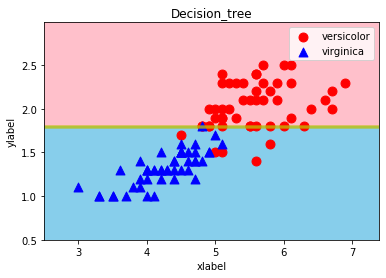

In [42]:
decision_region(X = X, y = y[:,0], model = Dt, 
                 step=0.01, title='Decision_tree',
                 xlabel='xlabel', ylabel='ylabel')

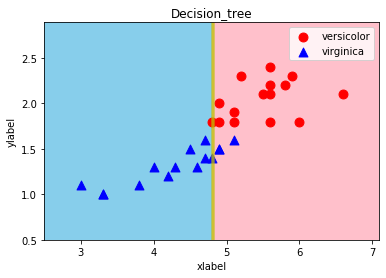

In [49]:
decision_region(X = X_test, y = y_test[:,0], model = Dt, 
                 step=0.01, title='Decision_tree',
                 xlabel='xlabel', ylabel='ylabel')

 # 【問題8】決定木の利用場面
最終発表時に以下の内容についてディスカッションを行います。自分なりの意見を用意しておいてください。

決定木が他の手法に比べて有効だと考えられるのはどういった場面か
注意点

答えがある問いではありません。いろいろな視点から見て理解を深めていきましょう。

 - 可読性が高い
 - 木を深くした場合は、過学習しやすい